In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA

def pool_hidden_states(hidden_states: np.ndarray, pool: str = "mean") -> np.ndarray:
    """
    Pool hidden states over the token dimension.

    Parameters:
        hidden_states (np.ndarray): Array of shape (L, T, H)
        pool (str): Pooling method — "mean", "first", or "last"

    Returns:
        np.ndarray: Pooled embeddings of shape (L, H)
    """
    if pool == "mean":
        pooled = hidden_states.mean(axis=1)
    elif pool == "median":
        pooled = np.median(hidden_states, axis=1)
    elif pool == "first":
        pooled = hidden_states[ :, 0, :]
    elif pool == "last":
        pooled = hidden_states[ :, -1, :]
    else:
        raise ValueError(f"Unsupported pool type: {pool}")

    return pooled  # shape: (L, H)


metadata = pd.read_csv("outputs/book_of_life_sample_3.csv")


In [7]:
print('\n'.join(metadata.iloc[0:3].text.values))

A 41-year-old single female from Zwolle, born in Zwolle, earning 41,305 euros per year, has no history of cardiovascular disease.
A 68-year-old divorced male from Zwolle, born in Groningen, earning 35,514 euros per year, has no history of cardiovascular disease.
A 54-year-old divorced male from Maastricht, born in Maastricht, earning 41,376 euros per year, has no history of cardiovascular disease.


In [8]:
metadata.to_csv("outputs/book_of_life_sample_3.csv", index=None)

In [9]:
with open("outputs/book_of_life_hidden_states_all_layers_sample_3.pt", "rb") as f:
    data = pickle.load(f)

summarized = {}

for i in data.keys():
     temp = np.nan_to_num(pool_hidden_states(data[i], pool="median"), nan=0.0, posinf=0.0, neginf=0.0)
     summarized[i] = temp[-1]

In [10]:
embedding_df = pd.DataFrame.from_dict(summarized, orient="index")
embedding_df.index.name = "person_id"
embedding_df.reset_index(inplace=True)  # person_id becomes a column
metadata["person_id"] = metadata["person_id"].astype(int)  # ensure type match
merged = pd.merge(embedding_df, metadata, on="person_id", how="inner")
merged

/scratch/gpfs/TROYANSKAYA/sokolova/predicting-zygosity/ttenv/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/scratch/gpfs/TROYANSKAYA/sokolova/predicting-zygosity/ttenv/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,person_id,0,1,2,3,4,5,6,7,8,...,5375,age,gender,income,city,birthplace,civil_status,nationality,cardio_history,text
0,0,-0.071289,0.037842,-0.843750,-0.023682,0.213867,-0.359375,0.769531,0.593750,-0.394531,...,-1.328125,41,female,41305,Zwolle,Zwolle,single,Dutch,0,"A 41-year-old single female from Zwolle, born ..."
1,1,-0.160400,0.104980,-1.308594,-0.001030,0.050629,-0.444336,0.804688,0.509766,-0.166260,...,-1.218750,68,male,35514,Zwolle,Groningen,divorced,Dutch,0,"A 68-year-old divorced male from Zwolle, born ..."
2,2,0.135742,0.073242,-0.882812,-0.024902,0.015320,-0.363281,0.566406,0.480469,-0.613281,...,-1.398438,54,male,41376,Maastricht,Maastricht,divorced,Dutch,0,"A 54-year-old divorced male from Maastricht, b..."
3,3,0.172852,0.468750,-1.054688,-0.025024,-0.054932,-0.574219,0.722656,0.406250,-0.531250,...,-1.062500,49,male,15000,Rotterdam,Groningen,divorced,Dutch,0,"A 49-year-old divorced male from Rotterdam, bo..."
4,4,0.185547,0.458984,-0.664062,-0.014893,0.314453,-0.570312,0.605469,0.539062,-0.835938,...,-0.859375,32,female,36704,Eindhoven,Rotterdam,married,Dutch,0,"A 32-year-old married female from Eindhoven, b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.055786,0.440430,-0.712891,-0.017822,0.156006,-0.599609,0.642578,0.234863,-0.671875,...,-1.042969,45,male,27762,Groningen,The Hague,widowed,Dutch,0,"A 45-year-old widowed male from Groningen, bor..."
96,96,-0.010376,0.147461,-0.703125,-0.015503,0.318359,-0.507812,0.480469,0.644531,-0.957031,...,-0.734375,46,female,38843,Eindhoven,Eindhoven,divorced,Dutch,0,"A 46-year-old divorced female from Eindhoven, ..."
97,97,0.018799,0.204102,-0.800781,-0.034424,0.208008,-0.554688,0.275391,0.239258,-0.324219,...,-0.687500,43,female,45117,Amsterdam,Groningen,single,Dutch,0,"A 43-year-old single female from Amsterdam, bo..."
98,98,-0.028931,0.104980,-0.978516,0.008545,-0.004669,-0.413086,0.209473,0.461914,-0.008545,...,-0.929688,23,female,44150,Amsterdam,Nijmegen,widowed,Dutch,1,"A 23-year-old widowed female from Amsterdam, b..."


/tmp/ipykernel_756106/1304182856.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x="gender", y="count", ax=axes[0], palette="Set2")
/tmp/ipykernel_756106/1304182856.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts, x="city", y="count", ax=axes[2], palette="Set3")


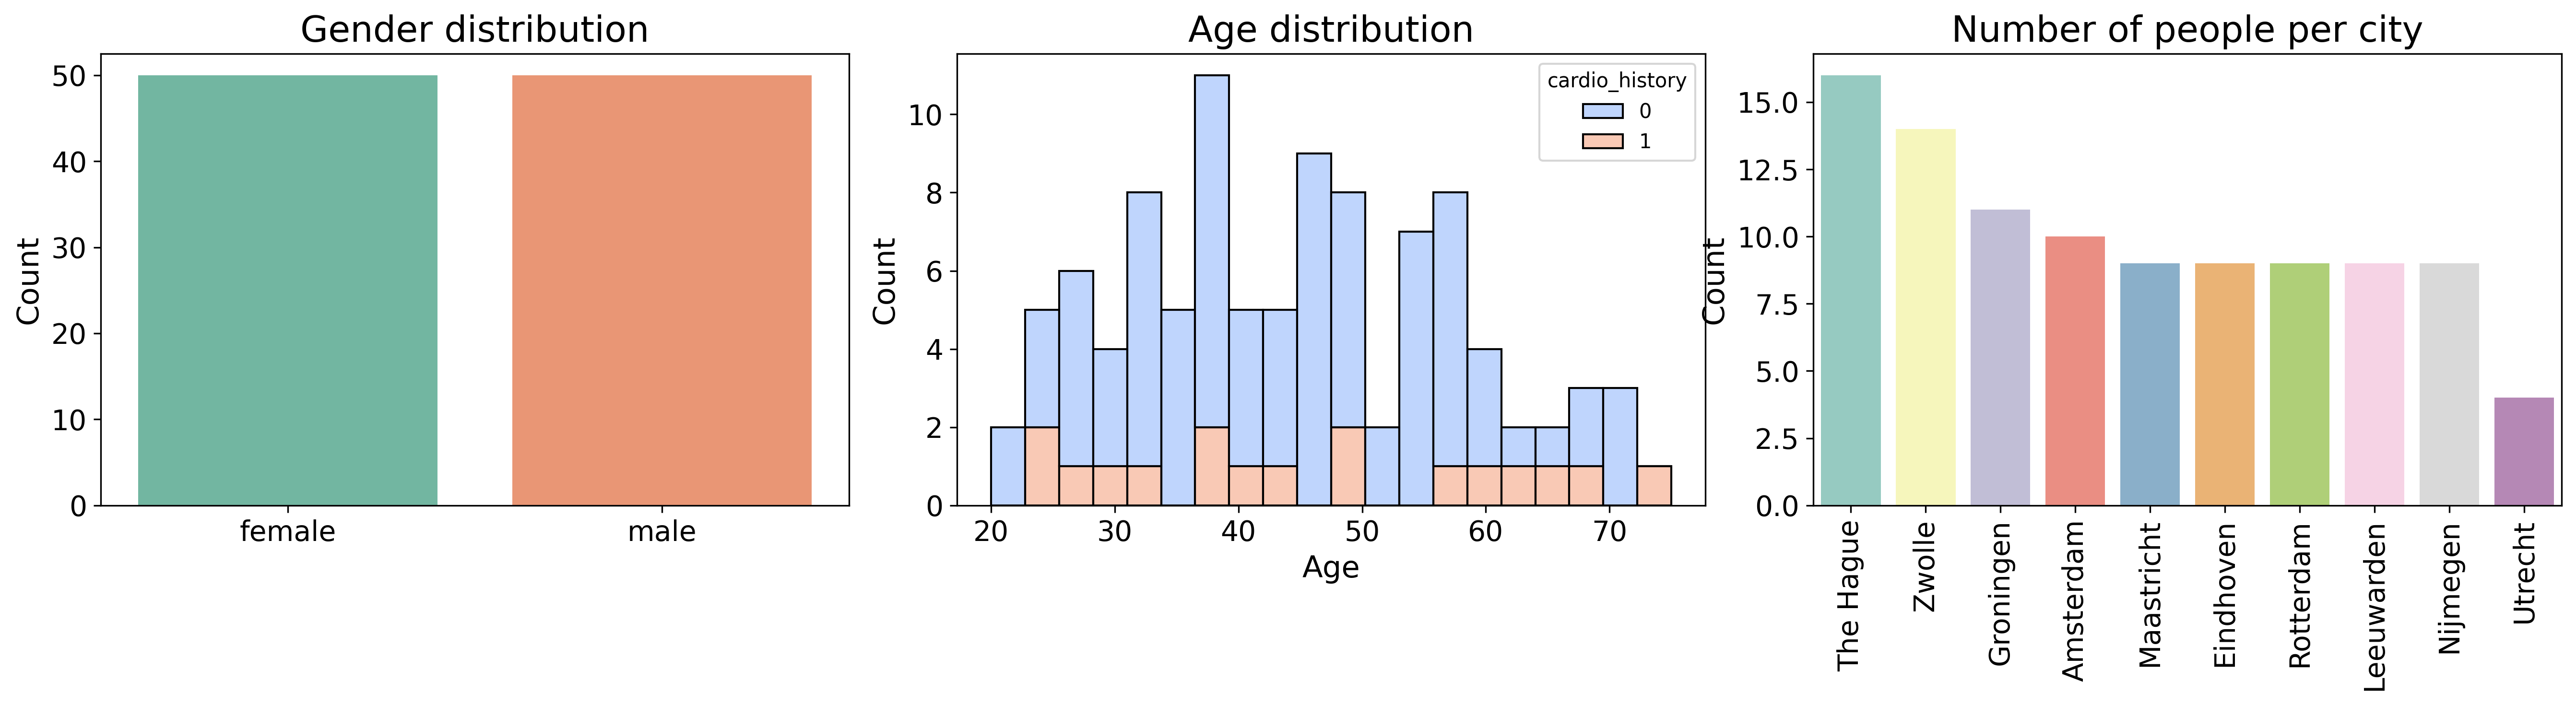

In [ ]:
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=300)

# Bar plot: gender counts
gender_counts = merged["gender"].value_counts().reset_index()
gender_counts.columns = ["gender", "count"]
sns.barplot(data=gender_counts, x="gender", y="count", ax=axes[0], palette="Set2")
axes[0].set_title("Gender distribution", fontsize=18)
axes[0].set_xlabel("")
axes[0].set_ylabel("Count", fontsize=15)

# Age distribution split by cardio_history
sns.histplot(data=merged, x="age", hue="cardio_history", multiple="stack", bins=20, 
             ax=axes[1], palette="coolwarm")
axes[1].set_title("Age distribution", fontsize=18)
axes[1].set_xlabel("Age", fontsize=15)
axes[1].set_ylabel("Count", fontsize=15)

# Bar plot: city counts
city_counts = merged["city"].value_counts().reset_index()
city_counts.columns = ["city", "count"]

# Plot all cities (sorted by count)
sns.barplot(data=city_counts, x="city", y="count", ax=axes[2], palette="Set3")
axes[2].set_title("Number of people per city", fontsize=18)
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_xlabel("", fontsize=15)
axes[2].set_ylabel("Count", fontsize=15)
# increase ticks fontsize
for ax in axes:
    ax.tick_params(axis='both', labelsize=14)

# Final layout
plt.tight_layout()
plt.show()


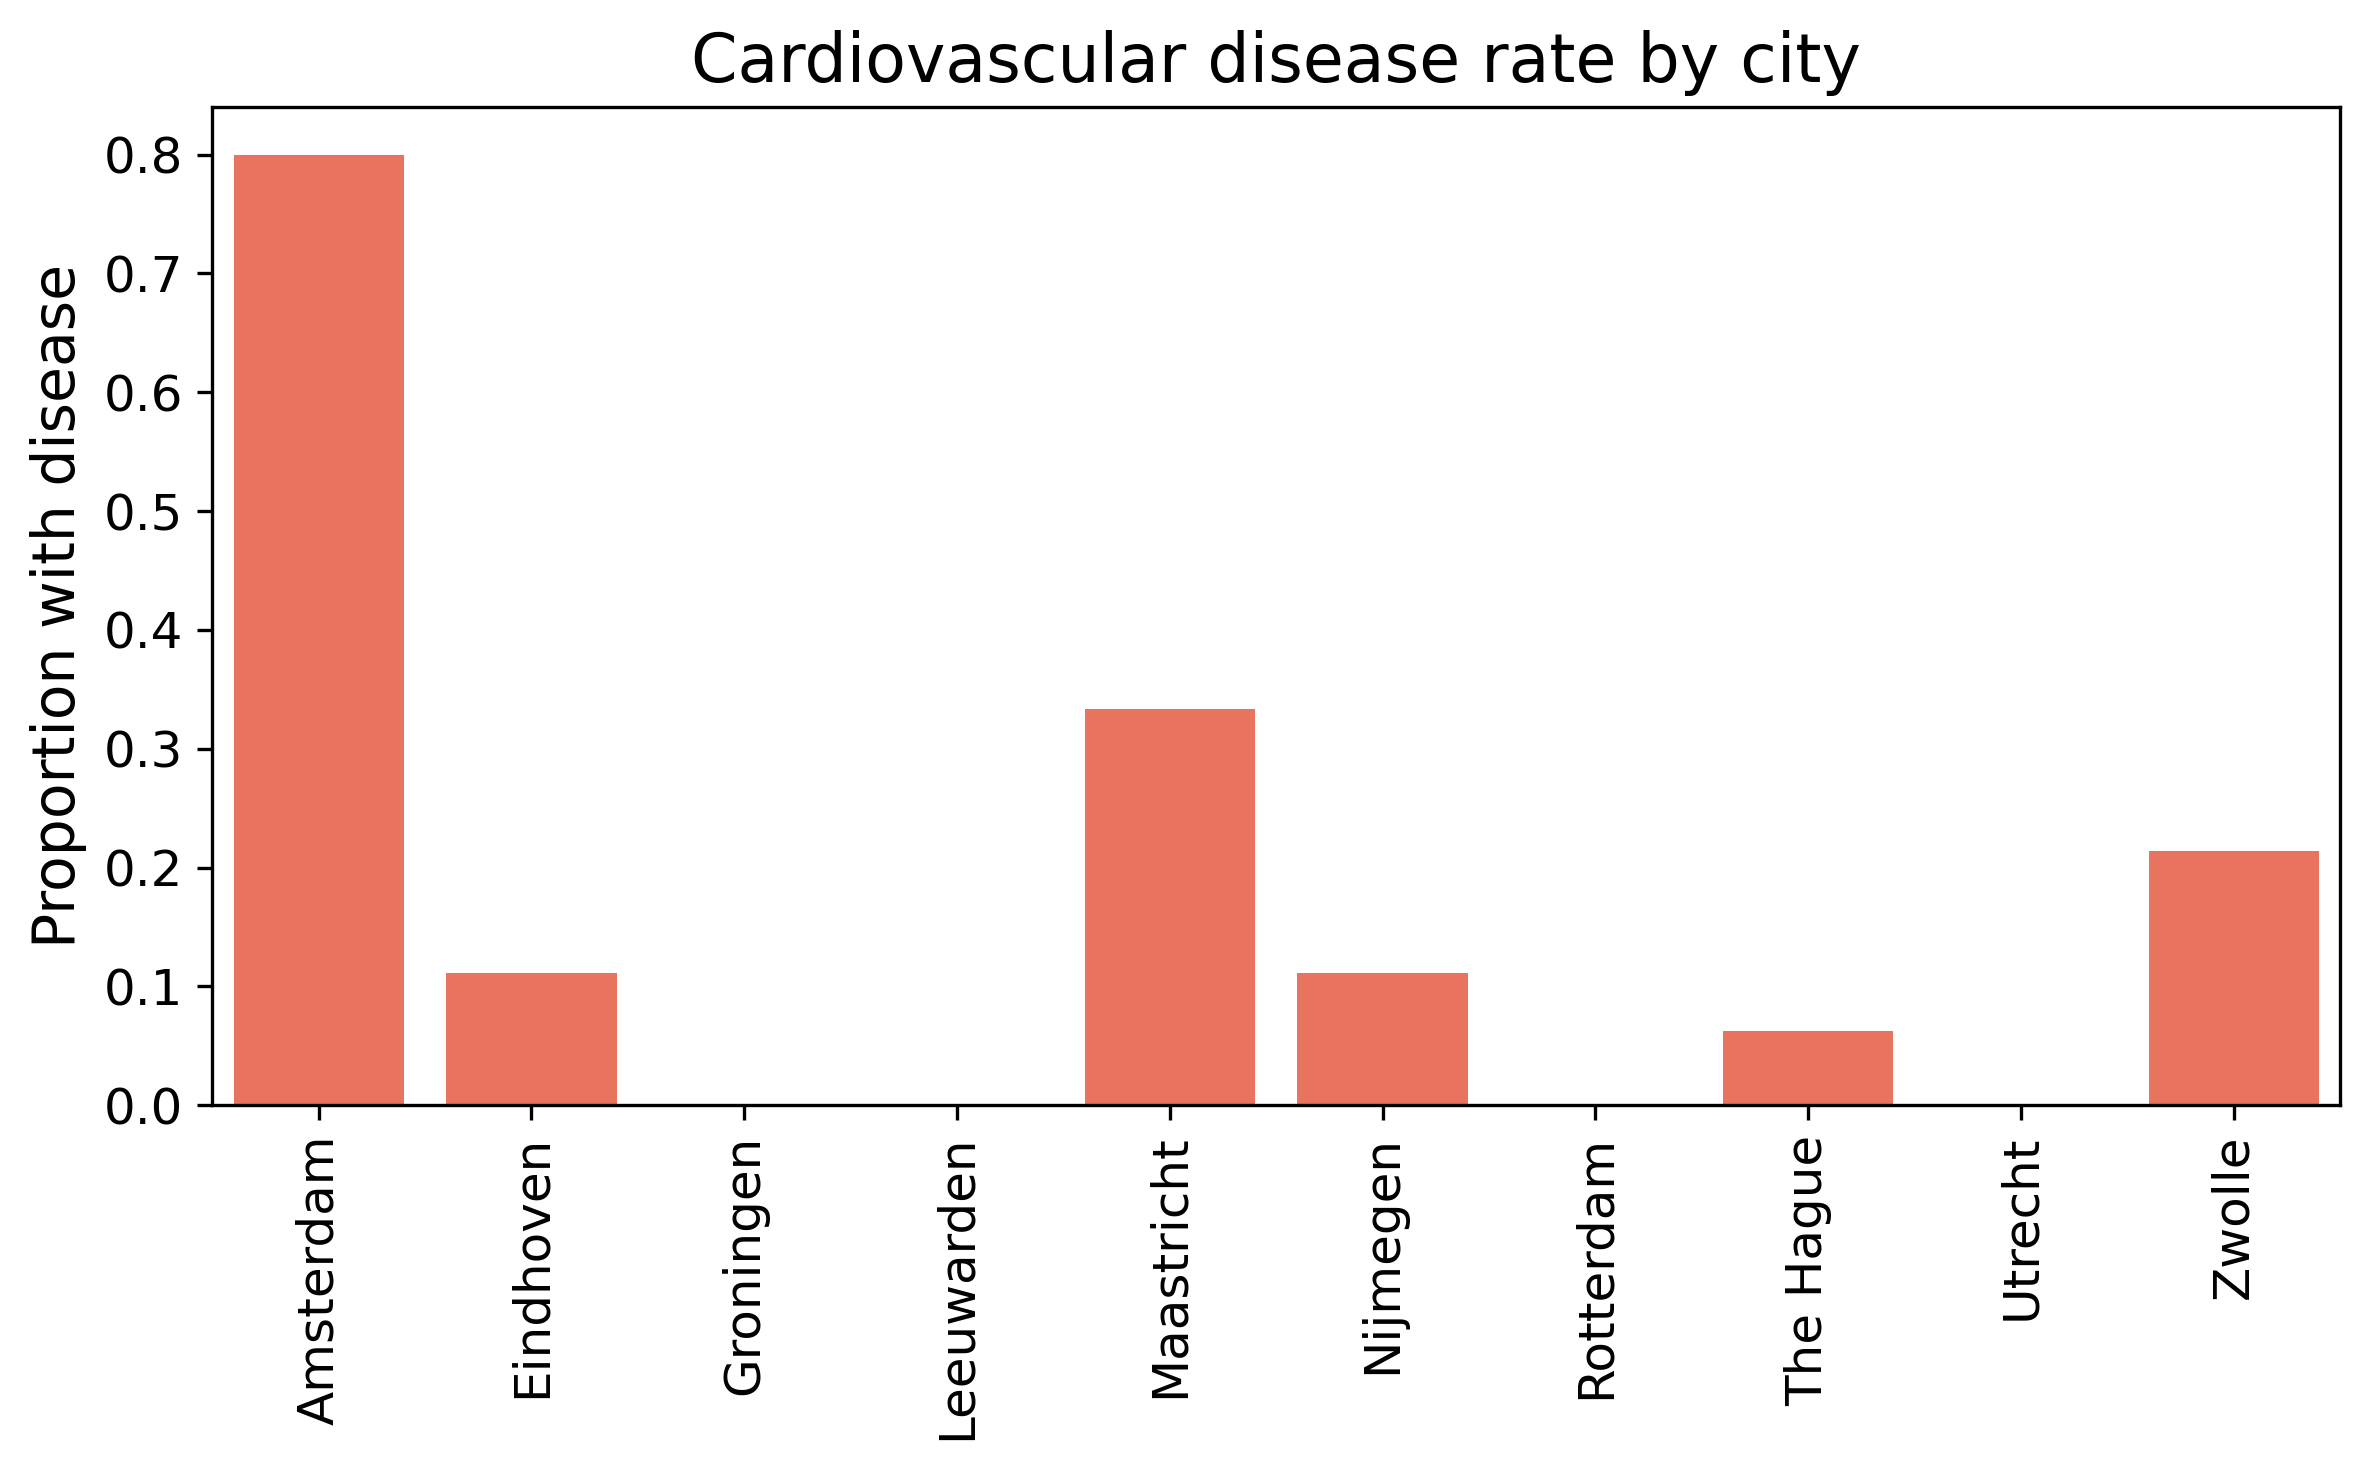

In [27]:
# Count total and cardio cases per city
total_by_city = merged.groupby("city").size()
cardio_by_city = merged[merged["cardio_history"] == 1].groupby("city").size()
cardio_rate = (cardio_by_city / total_by_city).fillna(0).reset_index()
cardio_rate.columns = ["city", "cardio_rate"]

# Plot
plt.figure(figsize=(8, 5), dpi=300)
sns.barplot(data=cardio_rate, x="city", y="cardio_rate", color='tomato')
plt.title("Cardiovascular disease rate by city", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Proportion with disease", fontsize=14)
plt.xticks(rotation=90, ha="center", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
X = merged.iloc[:, 1:embedding_df.shape[1]]  # only embedding columns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
merged["pca1"] = X_pca[:, 0]
merged["pca2"] = X_pca[:, 1]

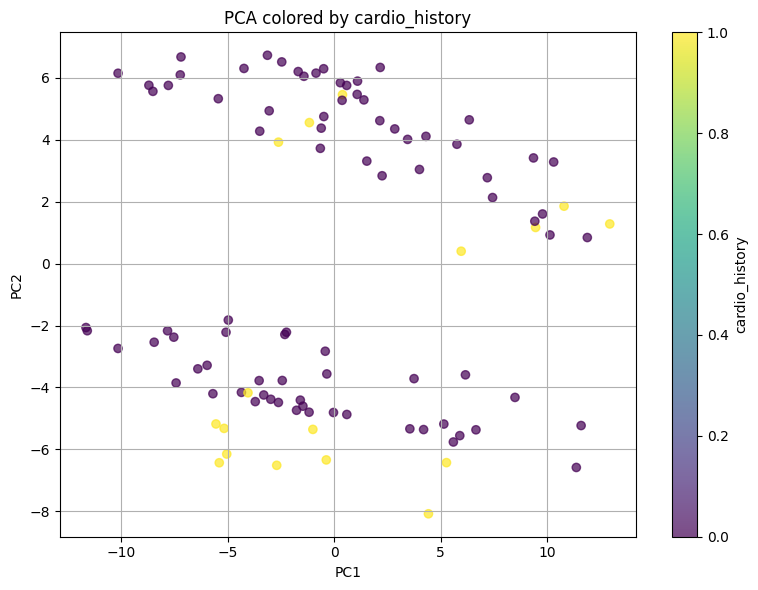

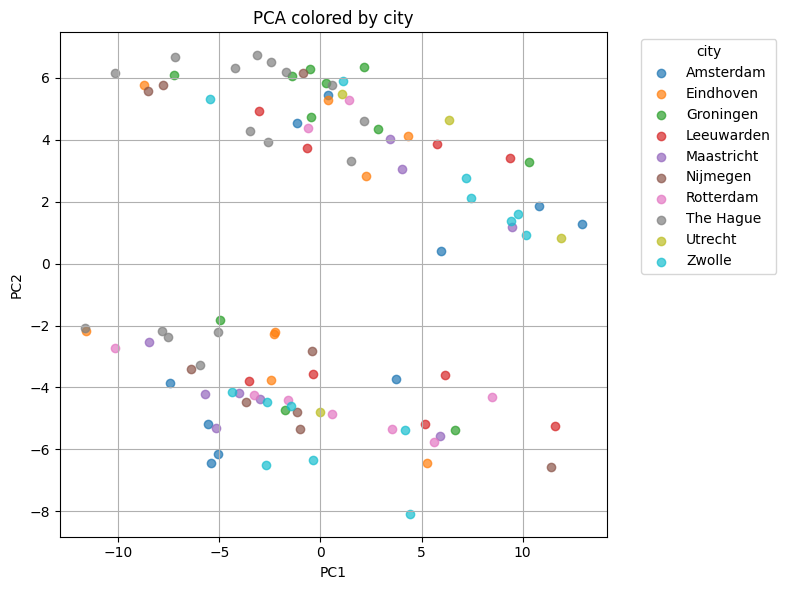

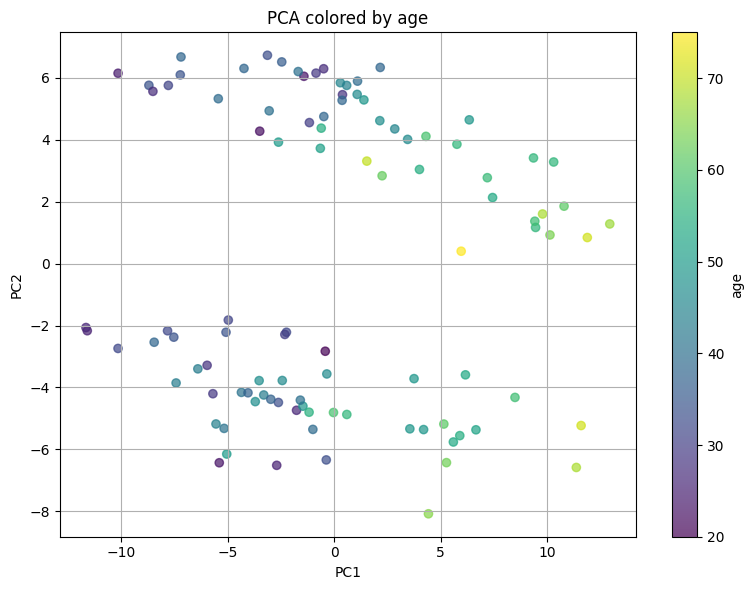

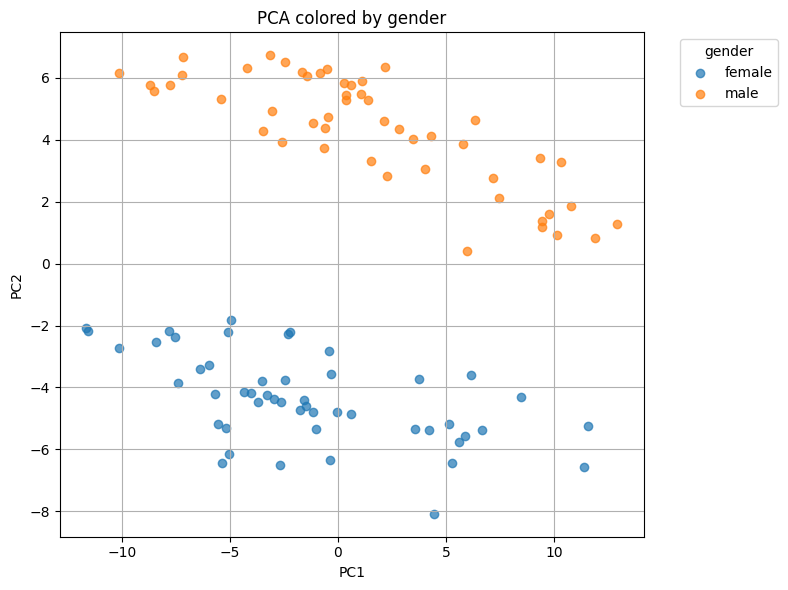

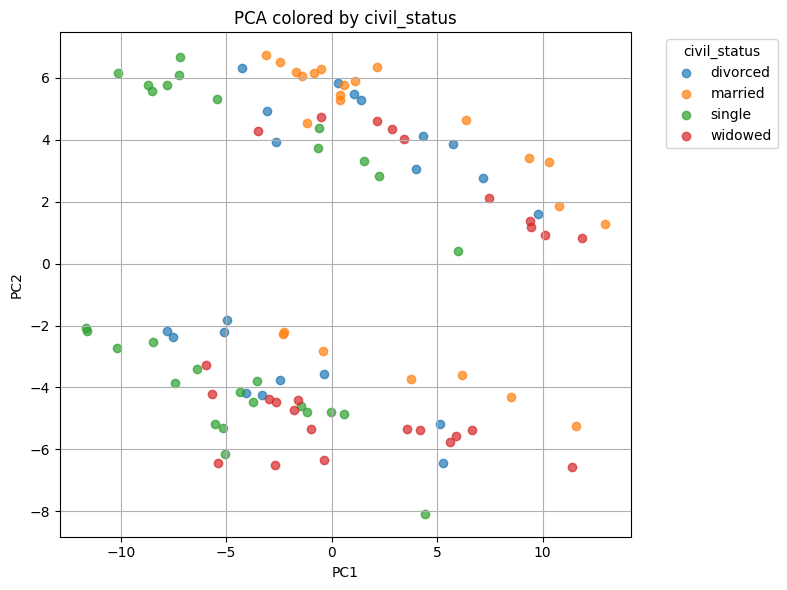

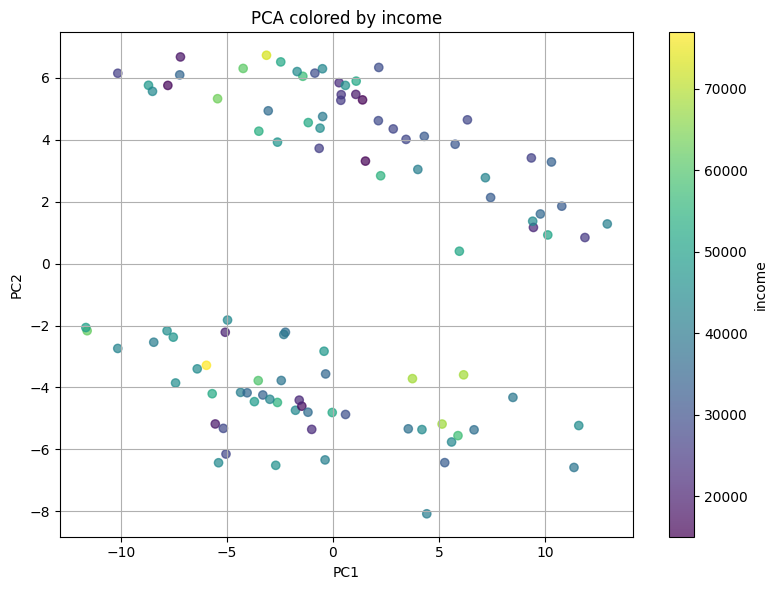

In [55]:

def plot_pca_by_column(df, color_by):
    plt.figure(figsize=(8, 6))
    values = df[color_by]

    if pd.api.types.is_numeric_dtype(values):
        scatter = plt.scatter(df["pca1"], df["pca2"], c=values, cmap="viridis", alpha=0.7)
        plt.colorbar(scatter, label=color_by)
    else:
        categories = values.astype("category")
        palette = plt.get_cmap("tab10")

        for i, category in enumerate(categories.cat.categories):
            subset = df[categories == category]
            plt.scatter(subset["pca1"], subset["pca2"],
                        label=str(category),
                        alpha=0.7,
                        color=palette(i % 10))  # wrap around if >10

        plt.legend(title=color_by, bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"PCA colored by {color_by}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# Example: color by 'age'
plot_pca_by_column(merged, color_by="cardio_history")
plot_pca_by_column(merged, color_by="city")
plot_pca_by_column(merged, color_by="age")
plot_pca_by_column(merged, color_by="gender")
plot_pca_by_column(merged, color_by="civil_status")
plot_pca_by_column(merged, color_by="income")